In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pyplot as plt
import kaepora as kpora
import kaepora_plot as kplot
import numpy as np
import spectral_analysis as sa

In [5]:
ssfr_all = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase and ((dm15_source >= .7 and dm15_source < 1.8) or (dm15_from_fits >= .7 and dm15_from_fits < 1.8))"

In [7]:
ssfr_array = kpora.grab(ssfr_all, multi_epoch = False, make_corr = True, verbose=True)


Using: ../data/kaepora_v1_DEV.db
3732 Total Spectra found
116 flagged spectra removed 3616 spectra left
82 spectra of peculiar Ias removed 3534 spectra left
364 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1989b sn1989b-19890427-o1i1.flm bsnip 56.3399611556 78.2981270419 47643.0 47564.512 0.002425 12.0 3346.0 8978.0
1990n sn1990n-19900731-oi.flm bsnip 246.978555483 21.4830649943 48103.193 48081.637 0.003395 13.0 3940.0 9816.0
1990o sn1990o-19900717-opt2.flm bsnip 67.146111096 12.5753882934 48089.0 48076.039 0.030664 11.0 3856.0 6818.0
1990y sn1990y-19900830-opt2.flm bsnip 5.49031052791 18.9579936749 48133.51 48113.812 0.039034 None 3844.0 6734.0
1991m sn1991m-19910407-final.flm bsnip 87.6428174913 17.8012082583 48353.0 48335.07 0.007235 14.0 3906.0 6898.0
1991s sn1991s-19910505-final.flm bsnip 0.0252803734457 31.8629659169 48381.0 48347.402 0.054453 19.0 3752.0 6588.0
1991t sn1991t-199204

2007ca sn2007ca-20070609.277-ui-corrected.flm bsnip 31.7273318586 33.1122431873 54260.277 54226.699 0.014066 14.0 3322.0 10304.0
2007cg sn2007cg-20070524.234-ui.flm bsnip 15.6642075998 20.0339528995 54244.234 54223.535 0.033196 14.0 3518.0 10098.0
2007ci sn2007ci-20070623.249-ui.flm bsnip 18.5142428339 27.5653504576 54274.249 54246.184 0.018126 1.0 3302.0 10262.0
2007co sn2007co-20070720.239-ui-corrected.flm bsnip 16.2870948264 35.6566260485 54301.239 54264.621 0.026962 None 3286.0 10270.0
2007cp sn2007cp-20070623.217-ui.flm bsnip 9.93328004133 4.30930112532 54274.217 54269.75 0.036595 None 3244.0 10078.0
2007cq sn2007cq-20070720.319-ui-corrected.flm bsnip 25.7038627453 20.1773533424 54301.319 54280.613 0.0262 None 3292.0 10282.0
2007f sn2007f-20070126.534-ui.flm bsnip 73.1916291229 3.15458029623 54126.534 54123.305 0.023591 15.0 3306.0 10208.0
2007if sn2007if-20071112.204-br.flm bsnip 35.5102014346 68.4816607708 54416.204 54342.641 0.0742 None 2974.0 8486.0
2007le sn2007le-20071118.18

2017fms 2017fms_20170718_goodman_Foundation.dat foundation 92.7639898901 -8.06990291262 57952.0 57960.312 0.03 None 3548.0 6842.0
ps15cku ps15cku_20151114_goodman_Foundation.dat foundation 68.1902790701 20.2400148543 57340.0 57319.289 0.0232732 None 3180.0 6838.0
ps16ccn ps16ccn_20160608_kosmos_Foundation.dat foundation 21.4317142409 37.6663314817 57547.0 57508.418 0.02431 None 4124.0 6842.0
atlas16dtf ATLAS16dtf_20161124_FLWO_Foundation.dat foundation 60.3532042899 5.14372014056 57716.0 57710.789 0.01308 None 3486.0 7272.0
ps16cqa ps16cqa_20160608_kosmos_Foundation.dat foundation 12.3716305505 2.46986799311 57547.0 57544.418 0.0454 None 4038.0 6708.0
ps16axi ps16axi_20160406_kosmos_Foundation.dat foundation 3.17592821801 22.731293629 57484.0 57460.359 0.04002 None 4058.0 6742.0
asassn15py asassn15py_20151011_goodman_Foundation.dat foundation 11.8770217003 19.287388206 57306.0 57285.836 0.04545 None 3592.0 6692.0
ps15bjg PS15bjg_20150726_SALT_Foundation.dat foundation 10.1989185813 -9.

In [8]:
names = []
ssf = []
nssf = []
values = []
for i, spec in enumerate(ssfr_array):
    names.append(spec.name)
    if spec.other_meta_data["globalssfr"]:
        ssf.append(spec.name)
        values.append(spec.other_meta_data["globalssfr"])
    else:
        nssf.append(spec.name)
        
for n in nssf:
    print n
names = set(names)
print len(names)
print len(ssf), len(nssf)

1989b
1991m
1991t
1992g
1993ac
1993ae
1994d
1994s
1995ak
1995d
1995e
1996ai
1996bv
1997br
1997cw
1997e
1997y
1998bp
1998bu
1998dm
1998dx
1998ec
1998es
1998v
1999aa
1999ac
1999cl
1999cw
1999dk
1999ee
1999ek
1999gd
1999gh
2000bk
2000ce
2000fa
2001bf
2001c
2001cp
2001ep
2001fh
2001g
2001gc
2001n
2001v
2002ar
2002bo
2002cd
2002dj
2002do
2002er
2002eu
2002fb
2002hu
2002hw
2002jy
2002kf
2003ai
2003d
2003k
2003kf
2003w
2004bg
2004dt
2004eo
2004fu
2005a
2005am
2005bo
2005el
2005ew
2005ki
2005ls
2005m
2006ax
2006br
2006bu
2006cc
2006cm
2006cp
2006cz
2006em
2006et
2006eu
2006gj
2006ha
2006hb
2006kf
2006le
2006lf
2006mp
2006os
2006td
2006x
2007ap
2007au
2007bc
2007bm
2007bz
2007ca
2007cg
2007ci
2007cp
2007if
2007le
2007on
2007qe
2007s
2008c
1995bd
1996ab
1996bo
1996x
1996z
1997dt
1998co
1999ej
2000b
2000e
2002es
2003cg
2008r
2005al
2006fw
2007ai
2007as
2007jh
2008bc
2008fp
1980n
1986g
1992a
2011iv
2016eoa
2017lm
2017iez
atlas16dpb
2016gfr
2018oh
2018cnw
ps16eqv
2017hju
ps16fbb
ps15asb
asassn15np


-10.69


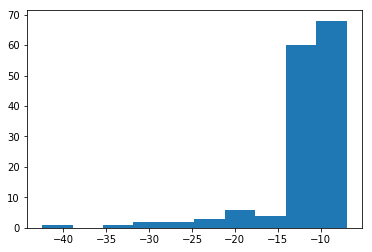

In [9]:
print np.median(values)
plt.hist(values)
plt.show()

In [24]:
ssfr_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8)) and globalssfr < -10.7",
              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8)) and globalssfr > -10.7"]


In [25]:
composites, sn_arrays, boot_sn_arrays = kpora.make_composite(ssfr_query, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8)) and globalssfr < -10.7
133 Total Spectra found
6 flagged spectra removed 127 spectra left
0 spectra of peculiar Ias removed 127 spectra left
126 spectra of SNe that have host reddening corrections
Arrays cleaned
126 spectra may have telluric contamination
48 total SNe
removed spectra of SNe with A_V > 2.0
Using 126 spectra of 48 SNe
Gini balancing...
Balanced after 15 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8)) and globalssfr > -10.7
143 Total Spectra found
5 flagged spectra removed 138 spectra left
0 spectra of peculiar Ias removed 138 spectra

In [26]:
# for spec in sn_arrays[0]:
#     print spec.name

Phase:  0.3755746354211354
dm15:  1.2012930390217473
Redshift:  0.023760311092085554
HR:  -0.04204835480827391
Phase:  0.2723251394877645
dm15:  1.0754828029208074
Redshift:  0.013599902389982587
HR:  nan


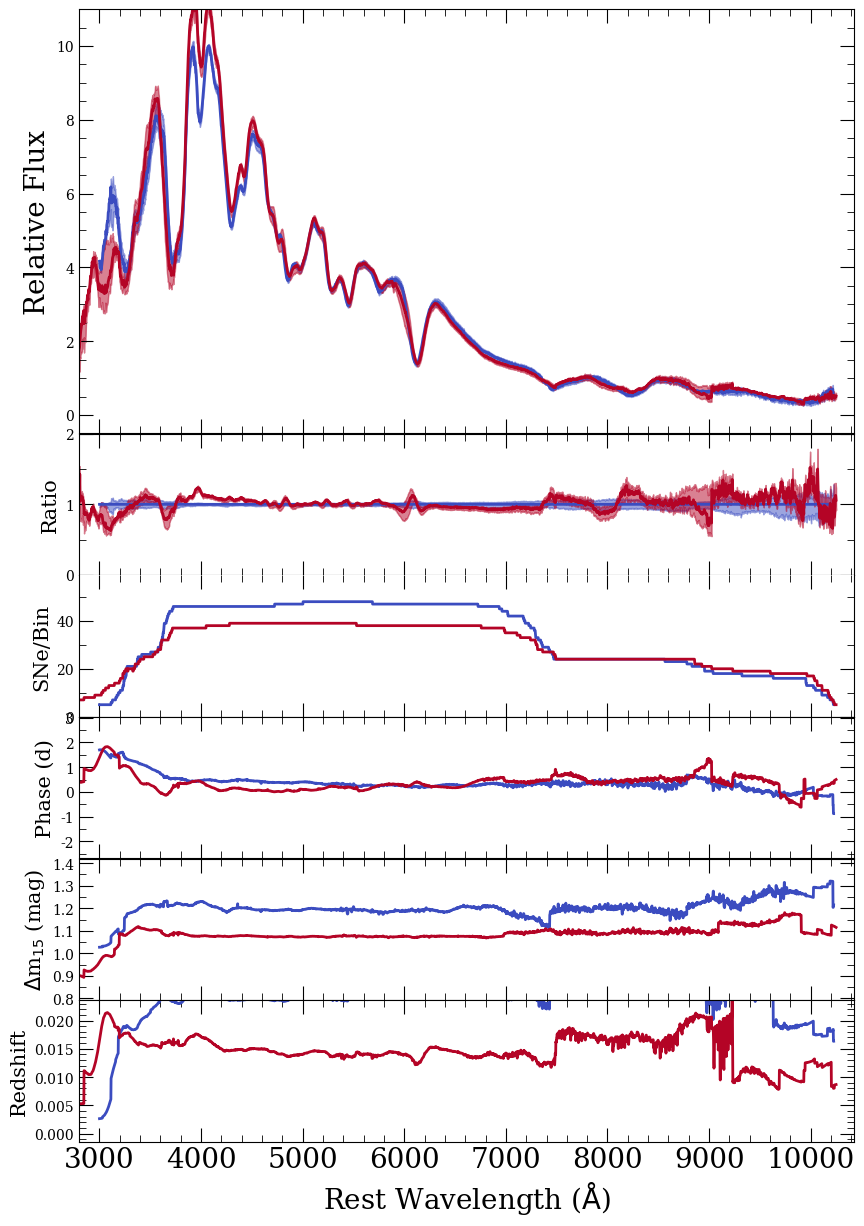

In [27]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)

In [14]:
query_strings_lowssfr = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7"]
max_phase = 50.
p1 = -10.
k = 4.
p2 = p1+k
while p1 < max_phase:
    query_strings_lowssfr.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_lowssfr:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -6.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -2.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -2.000000 and phase < 2.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7
SELECT * from Spectra inner join Events 

In [15]:
query_strings_highssfr = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7"]
max_phase = 50.
p1 = -10.
k = 4.
p2 = p1+k
while p1 < max_phase:
    query_strings_highssfr.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_highssfr:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -6.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -2.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -2.000000 and phase < 2.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 2.000000 and phas

In [16]:
composites_highssfr, sn_arrays_highssfr, boot_sn_arrays_highssfr = kpora.make_composite(query_strings_highssfr, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
40 Total Spectra found
1 flagged spectra removed 39 spectra left
0 spectra of peculiar Ias removed 39 spectra left
37 spectra of SNe that have host reddening corrections
Arrays cleaned
37 spectra may have telluric contamination
12 total SNe
removed spectra of SNe with A_V > 2.0
Using 37 spectra of 12 SNe
Gini balancing...
Balanced after 12 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -6.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
78 Total Spectra found
3 flagged spectra removed 75 spectra left
0 spectra of peculiar Ias removed 75 spectra left
69 spe

19 total SNe
removed spectra of SNe with A_V > 2.0
Using 32 spectra of 19 SNe
Gini balancing...
Balanced after 11 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 34.000000 and phase < 38.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
23 Total Spectra found
0 flagged spectra removed 23 spectra left
0 spectra of peculiar Ias removed 23 spectra left
22 spectra of SNe that have host reddening corrections
Arrays cleaned
22 spectra may have telluric contamination
17 total SNe
removed spectra of SNe with A_V > 2.0
Using 22 spectra of 17 SNe
Gini balancing...
Balanced after 9 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 38.000000 and phase < 42.000000 and ((dm15_source >= .8 and

In [17]:
composites_lowssfr, sn_arrays_lowssfr, boot_sn_arrays_lowssfr = kpora.make_composite(query_strings_lowssfr, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7
3 Total Spectra found
0 flagged spectra removed 3 spectra left
0 spectra of peculiar Ias removed 3 spectra left
3 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
3 total SNe
removed spectra of SNe with A_V > 2.0
Using 3 spectra of 3 SNe
Gini balancing...
Balanced after 1 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -6.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7
30 Total Spectra found
1 flagged spectra removed 29 spectra left
0 spectra of peculiar Ias removed 29 

20 Total Spectra found
1 flagged spectra removed 19 spectra left
0 spectra of peculiar Ias removed 19 spectra left
19 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
15 total SNe
removed spectra of SNe with A_V > 2.0
Using 19 spectra of 15 SNe
Gini balancing...
Balanced after 4 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 34.000000 and phase < 38.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7
8 Total Spectra found
0 flagged spectra removed 8 spectra left
0 spectra of peculiar Ias removed 8 spectra left
8 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
8 total SNe
removed spectra of SNe with A_V > 2.0
Using 8 spectra of 8 SNe
Gini balancing...
Balanced a

Phase:  -11.476586969961009
dm15:  0.9739977060658086
Redshift:  0.024863752517036188
HR:  nan
Phase:  -11.34481298646495
dm15:  1.0778016504137349
Redshift:  0.00675177327970184
HR:  nan


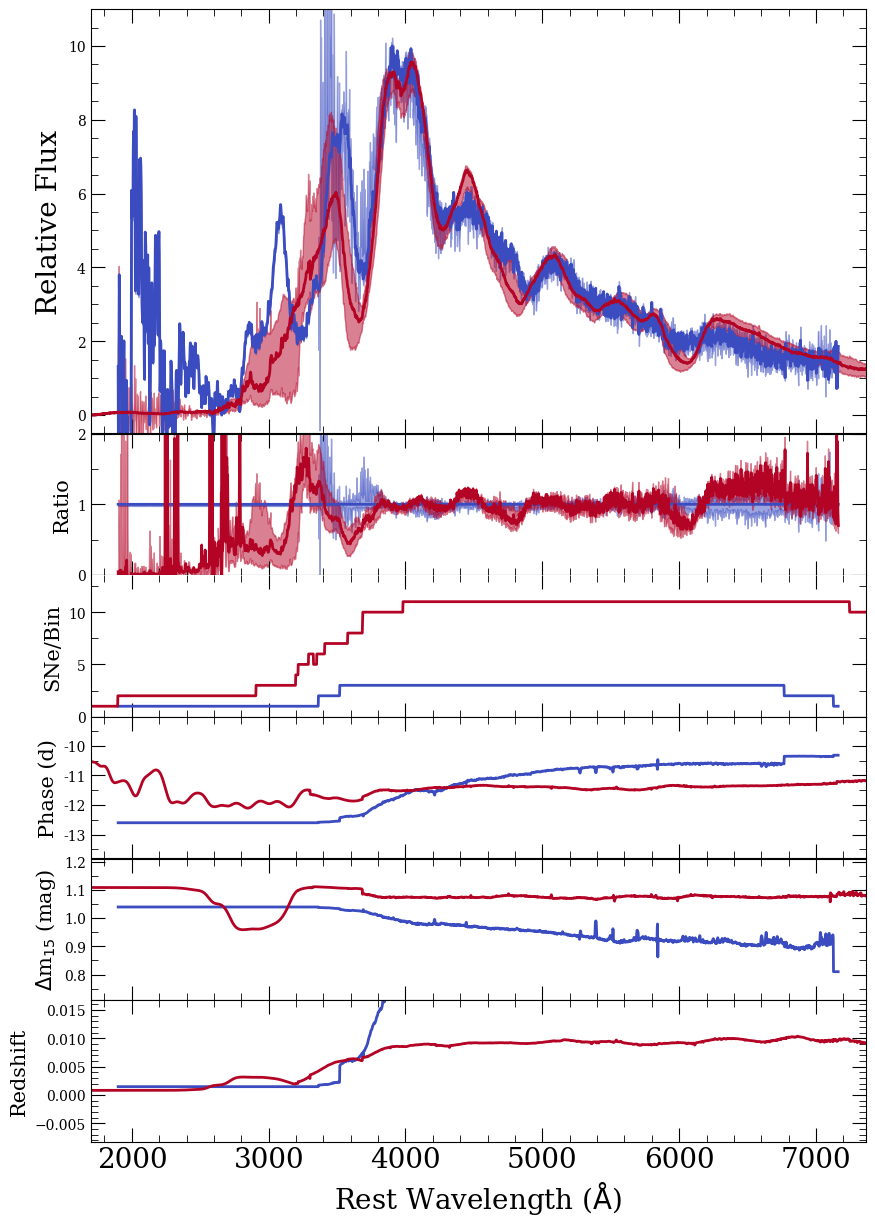

Phase:  -7.769324210362549
dm15:  1.0746495872001538
Redshift:  0.020654151648105433
HR:  nan
Phase:  -7.702869983772351
dm15:  1.0399205000560718
Redshift:  0.013611540289734592
HR:  nan


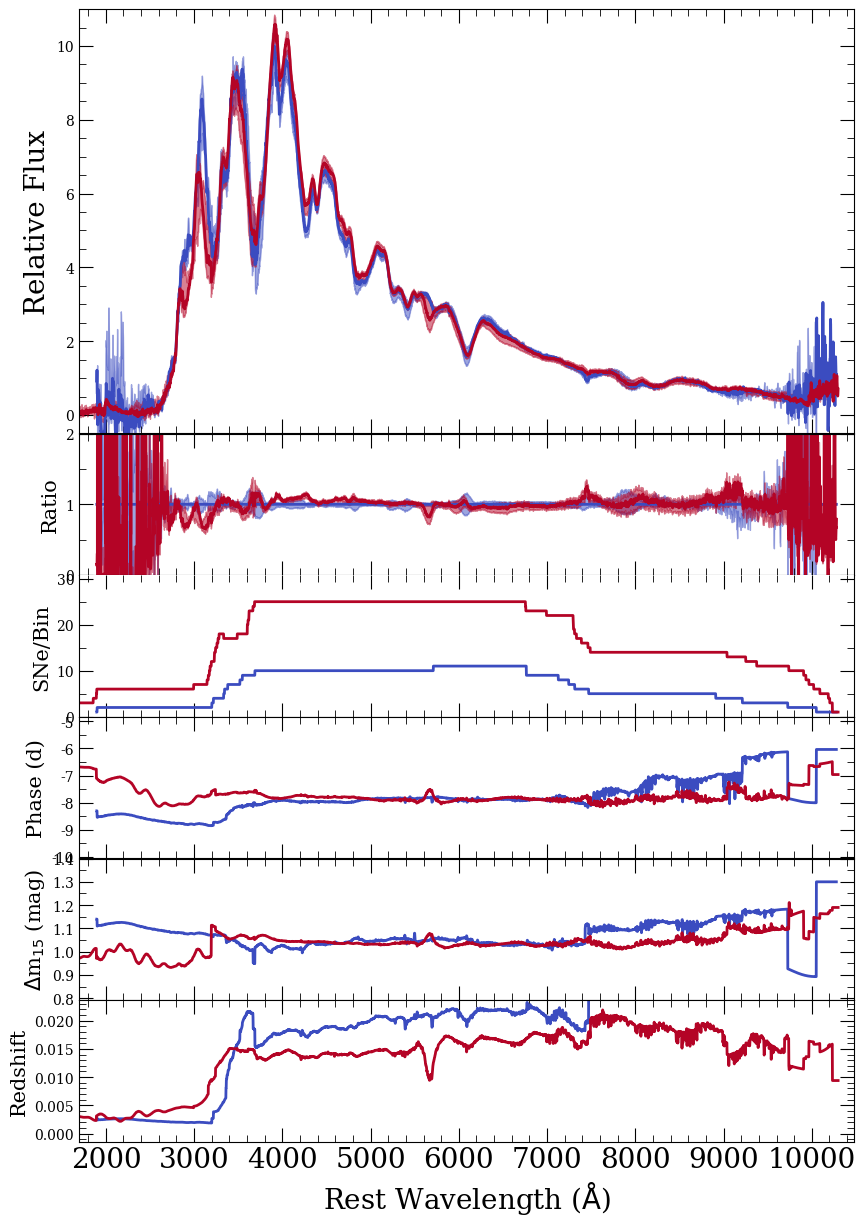

Phase:  -3.555120789787782
dm15:  1.1035297159098771
Redshift:  0.023222839829231248
HR:  nan
Phase:  -4.119034444912944
dm15:  1.0480393691082557
Redshift:  0.01423434169922771
HR:  nan


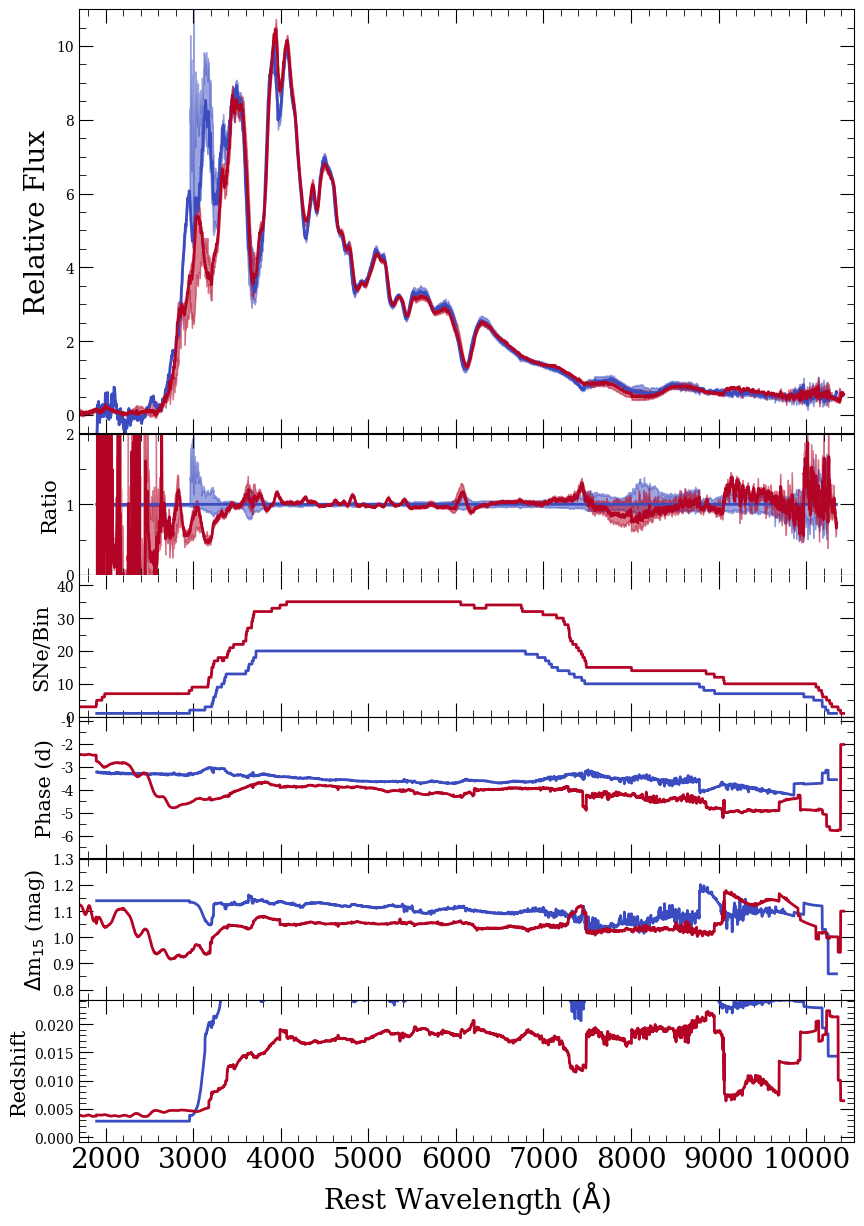

Phase:  0.05447983417460738
dm15:  1.1556990521672106
Redshift:  0.017523945229119015
HR:  nan
Phase:  0.0038382910927053696
dm15:  1.0651062254395498
Redshift:  0.011200301933758781
HR:  nan


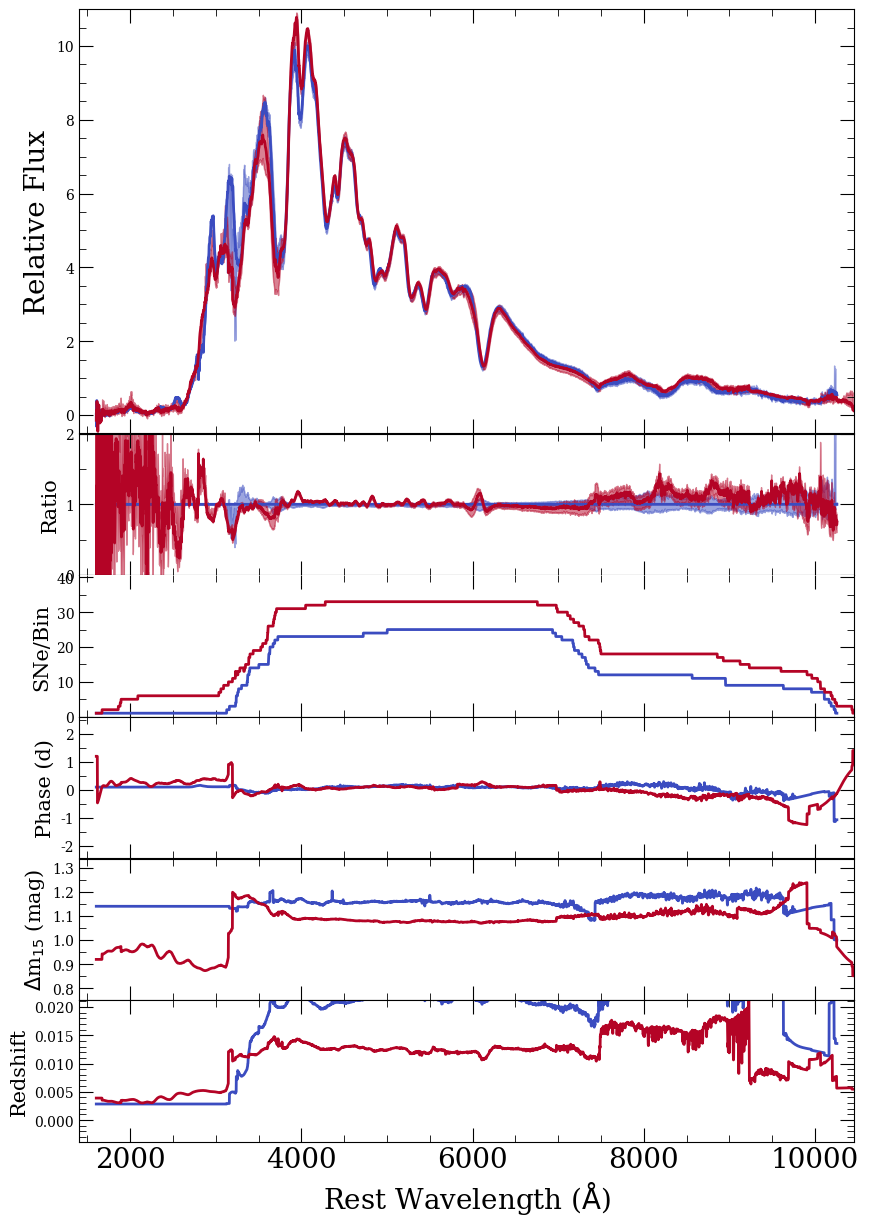

Phase:  3.5810949916908976
dm15:  1.0964780998032666
Redshift:  0.020674713692611073
HR:  nan
Phase:  3.7292984898293797
dm15:  1.0854928295762636
Redshift:  0.009738960505808086
HR:  nan


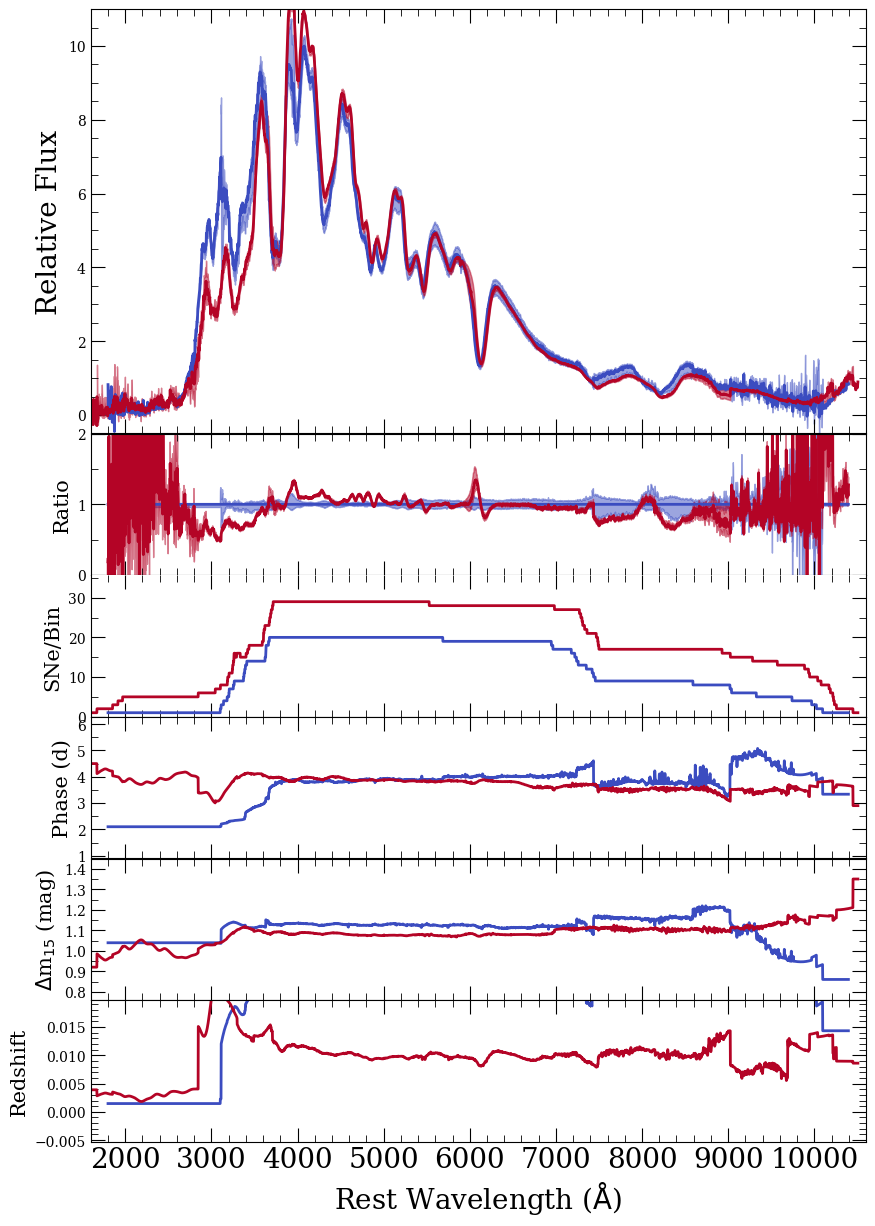

Phase:  7.782202176558218
dm15:  1.1804086708746626
Redshift:  0.022133909357843297
HR:  -0.05984394022409684
Phase:  8.113413230981566
dm15:  1.0729785477055476
Redshift:  0.01191116768359797
HR:  nan


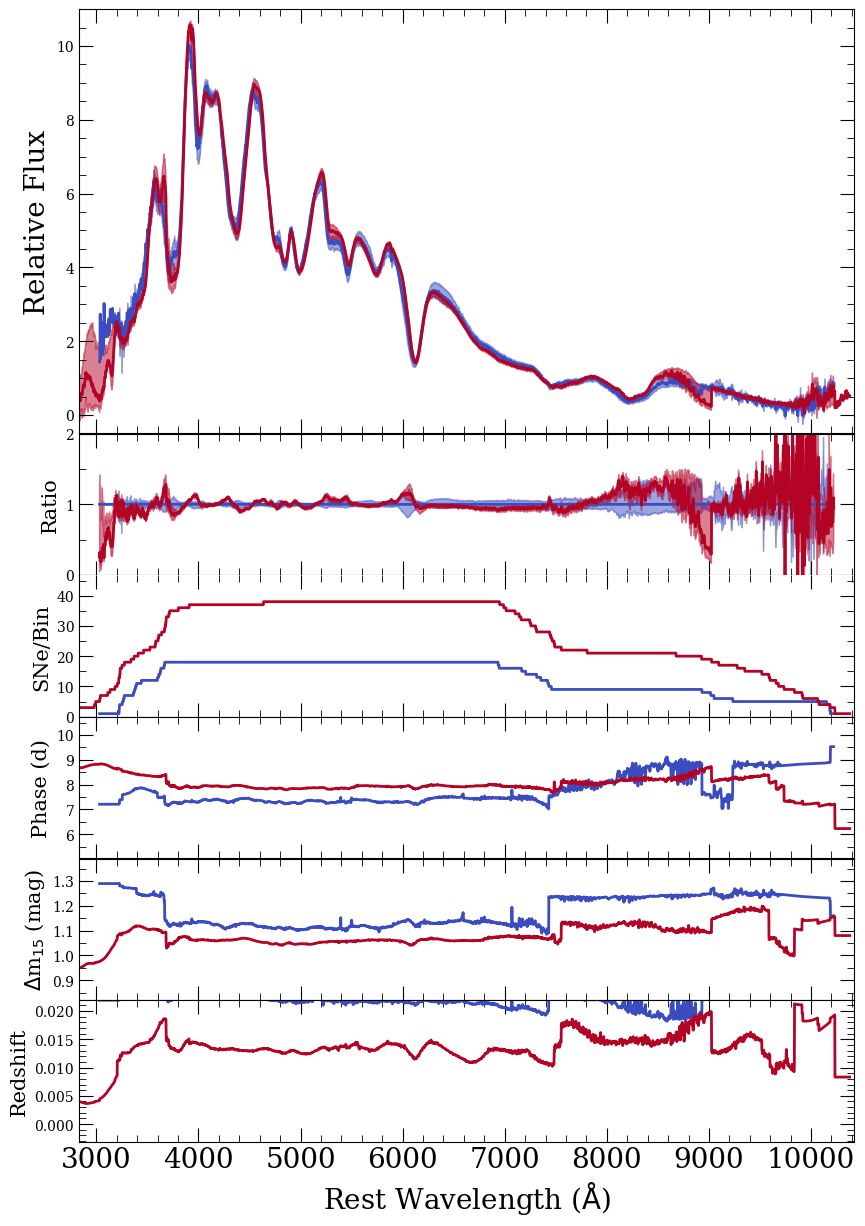

Phase:  12.421315351602354
dm15:  1.1530502448340532
Redshift:  0.024978809092165082
HR:  nan
Phase:  12.141306253718986
dm15:  1.029620144351177
Redshift:  0.01050996048693144
HR:  nan


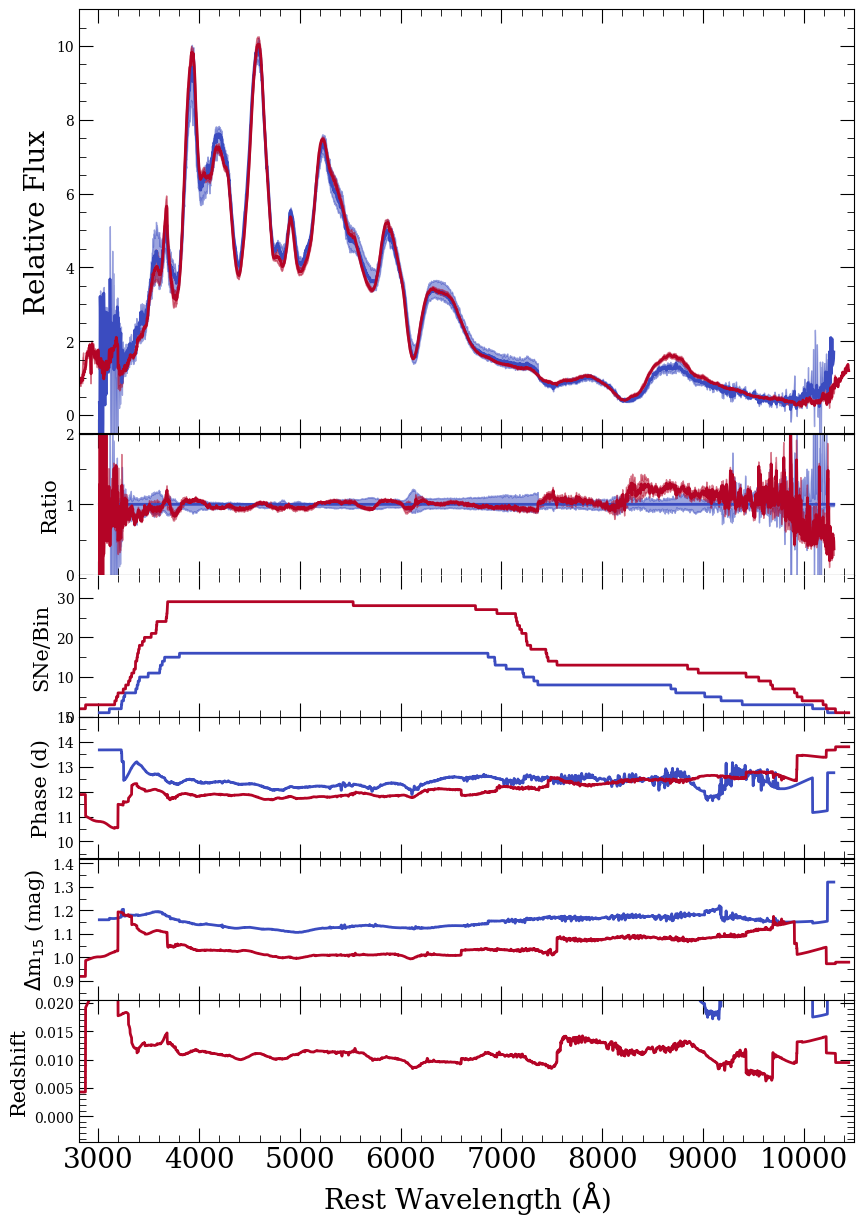

Phase:  15.610367680069045
dm15:  1.1295671417421334
Redshift:  0.027168962493528882
HR:  -0.06587244203159963
Phase:  16.009804225136374
dm15:  1.0418994843779934
Redshift:  0.010034796309142925
HR:  nan


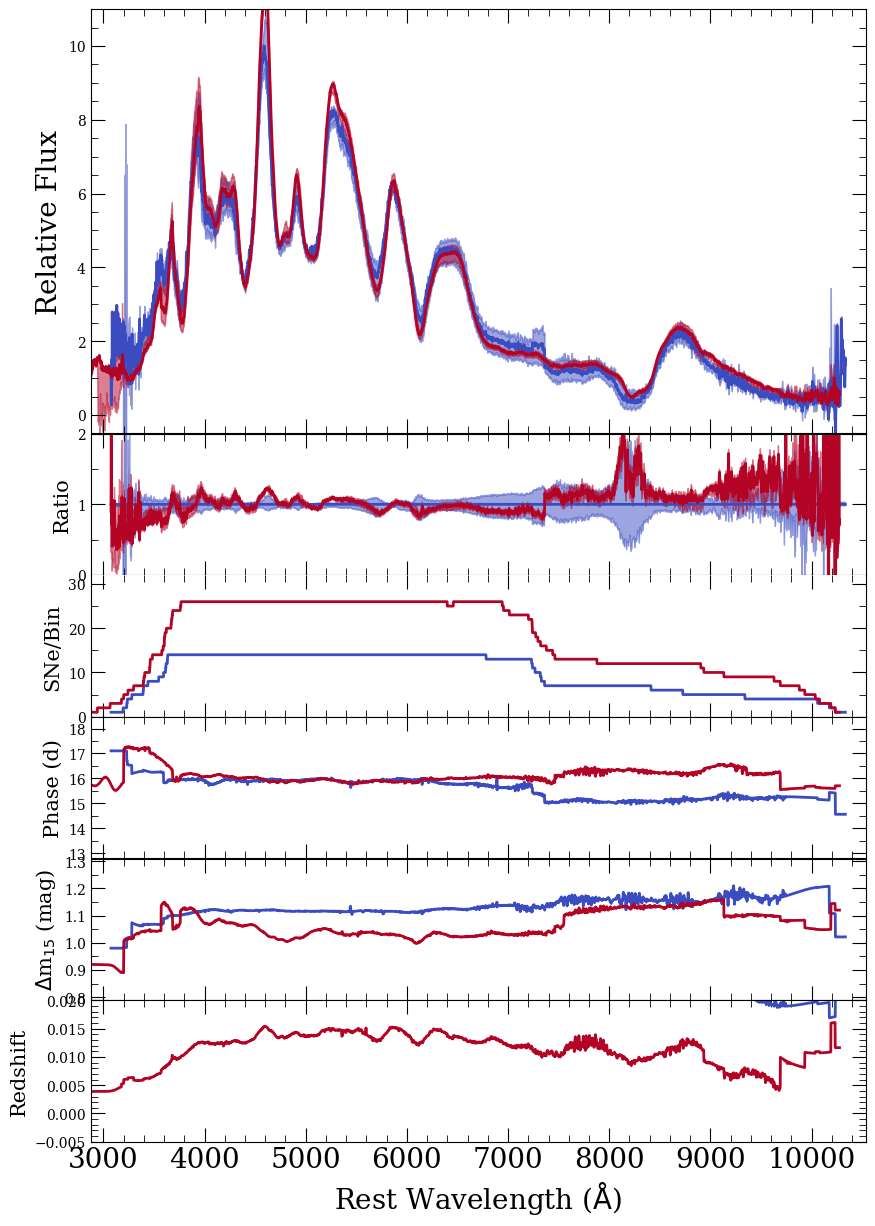

Phase:  19.427608725420782
dm15:  1.0964244604987772
Redshift:  0.024465487044532604
HR:  0.08057462326163224
Phase:  20.24447462198674
dm15:  1.0079365995861242
Redshift:  0.00964172867043755
HR:  nan


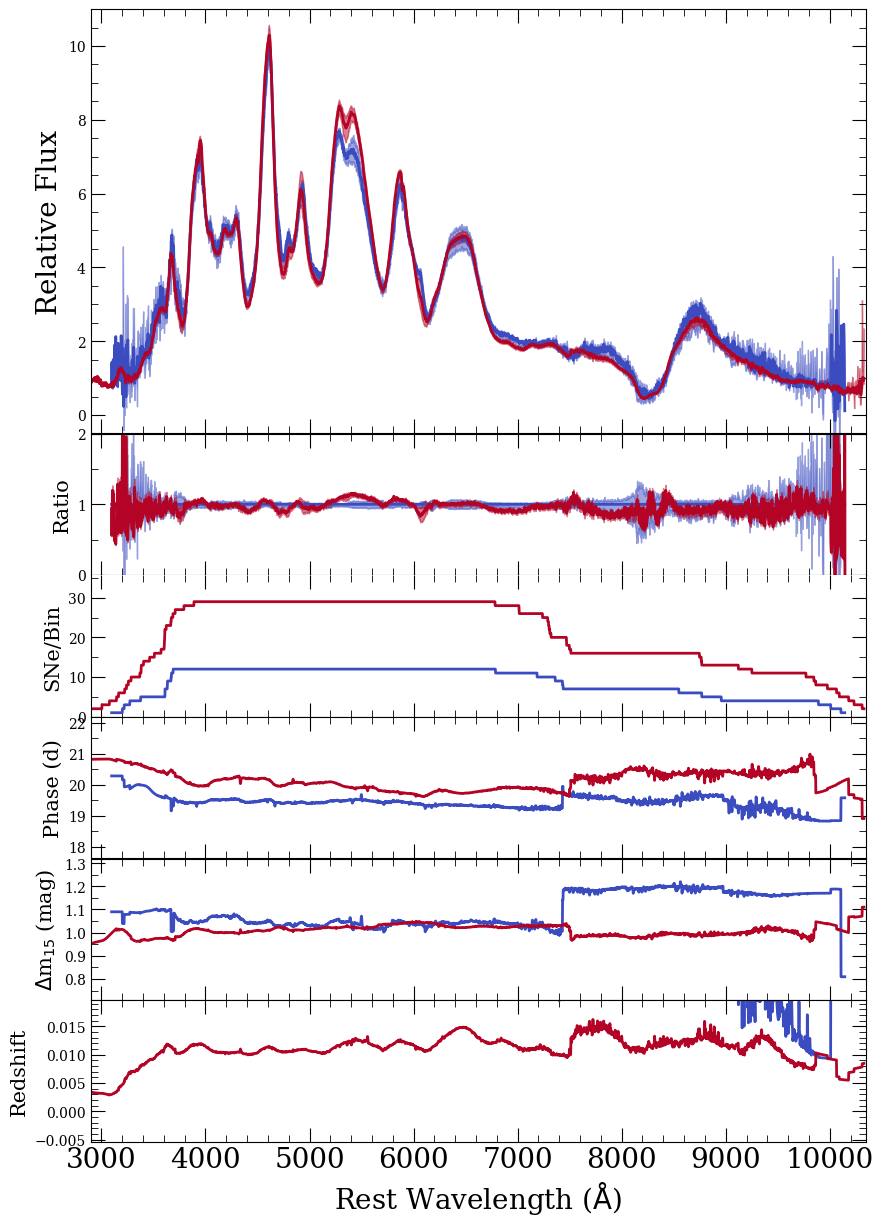

Phase:  24.225089470706948
dm15:  1.1092232960313504
Redshift:  0.02092491387954318
HR:  nan
Phase:  24.364232241015756
dm15:  1.0714430236277743
Redshift:  0.01504472067175448
HR:  nan


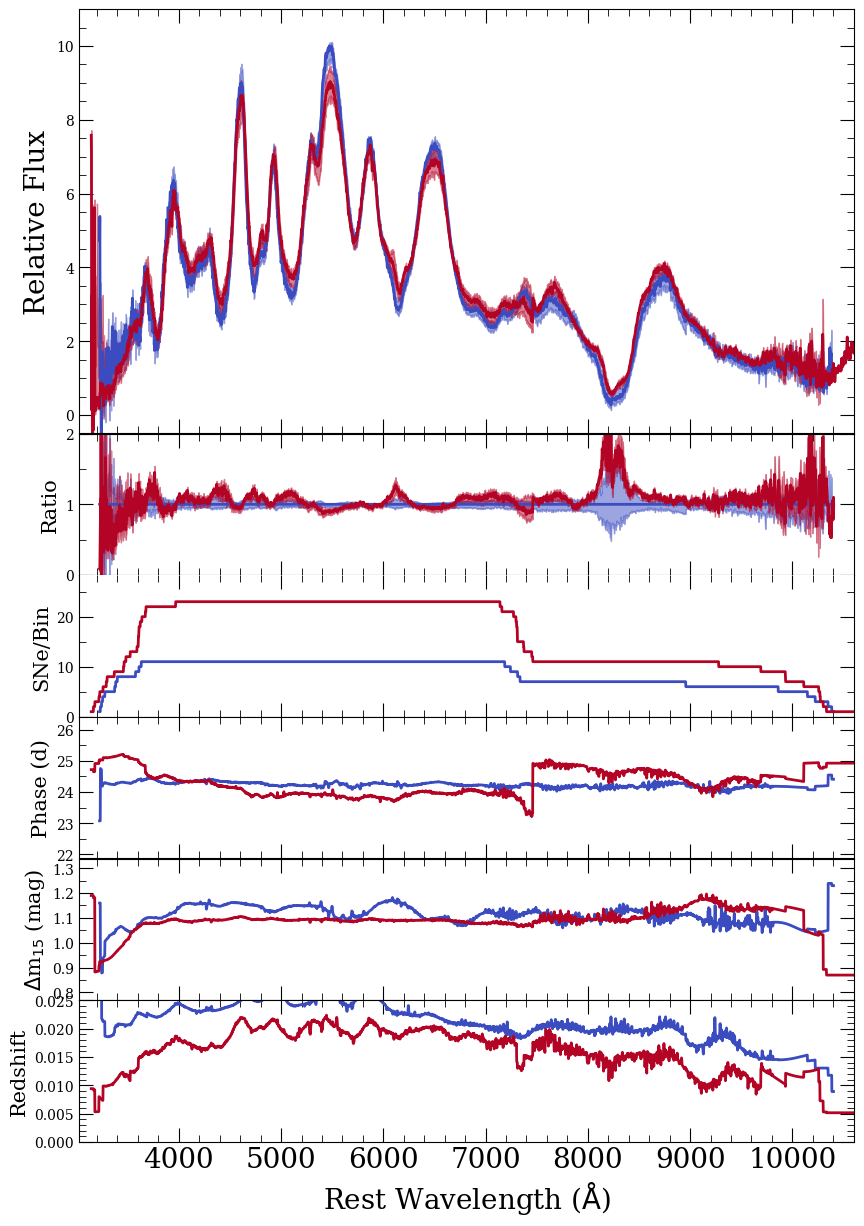

Phase:  27.80206859747523
dm15:  1.090689383187471
Redshift:  0.01785139223103181
HR:  nan
Phase:  28.02440281679793
dm15:  1.0825965666551312
Redshift:  0.008374824122655895
HR:  nan


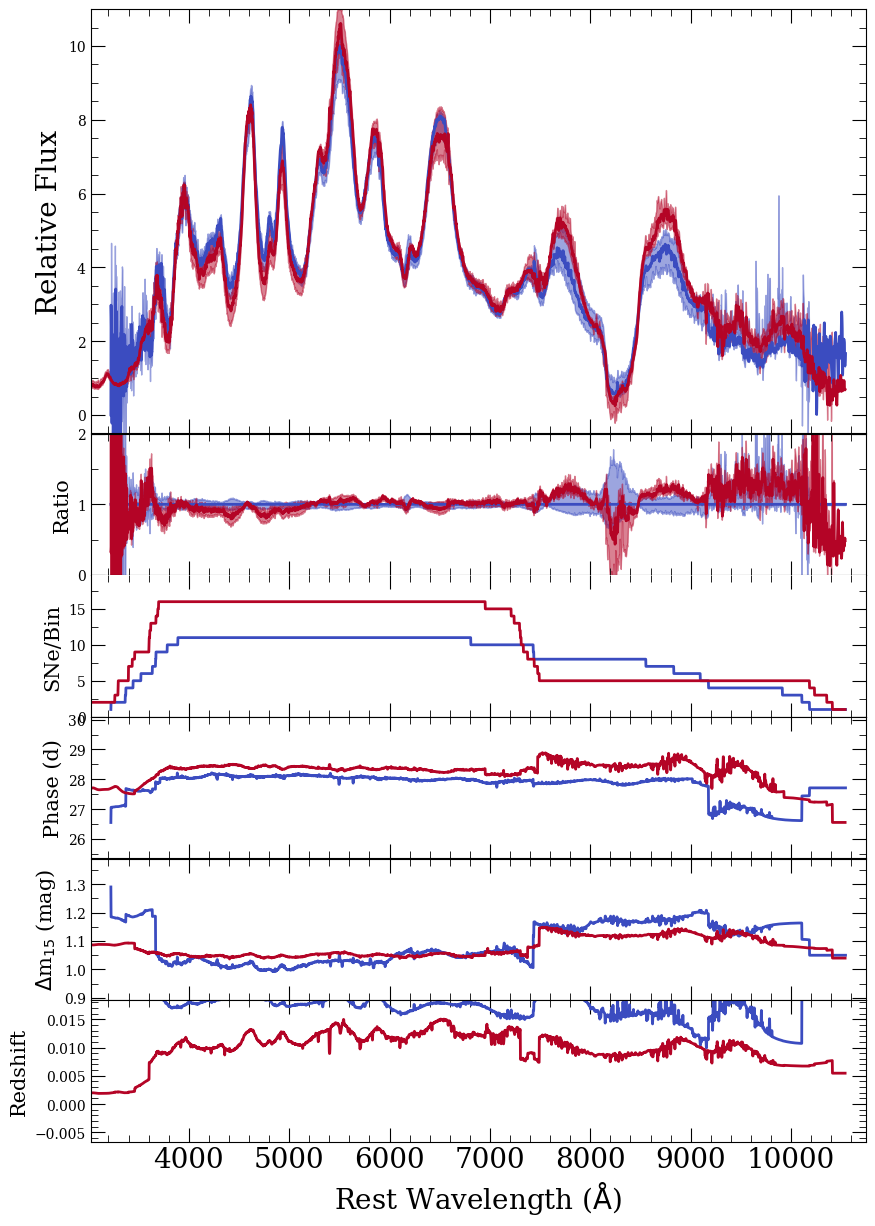

Phase:  31.633543304594852
dm15:  1.1822084630910894
Redshift:  0.02388567942305
HR:  -0.09625960678751065
Phase:  32.278846529483026
dm15:  1.0682065952106377
Redshift:  0.011720889846803603
HR:  nan


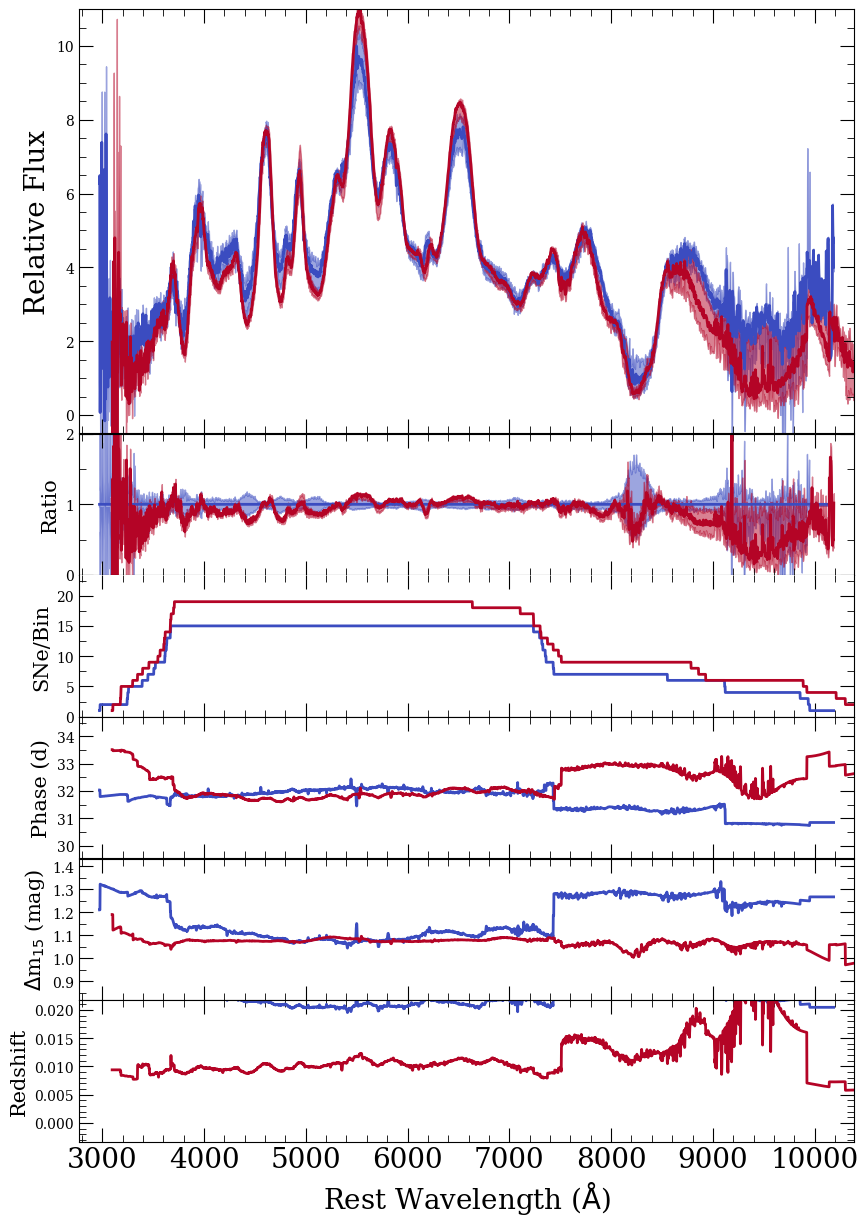

Phase:  36.20594381214291
dm15:  1.188985660608778
Redshift:  0.023029047827465628
HR:  -0.049287729900901286
Phase:  35.94590743976308
dm15:  1.1099870781421335
Redshift:  0.010274659885823158
HR:  nan


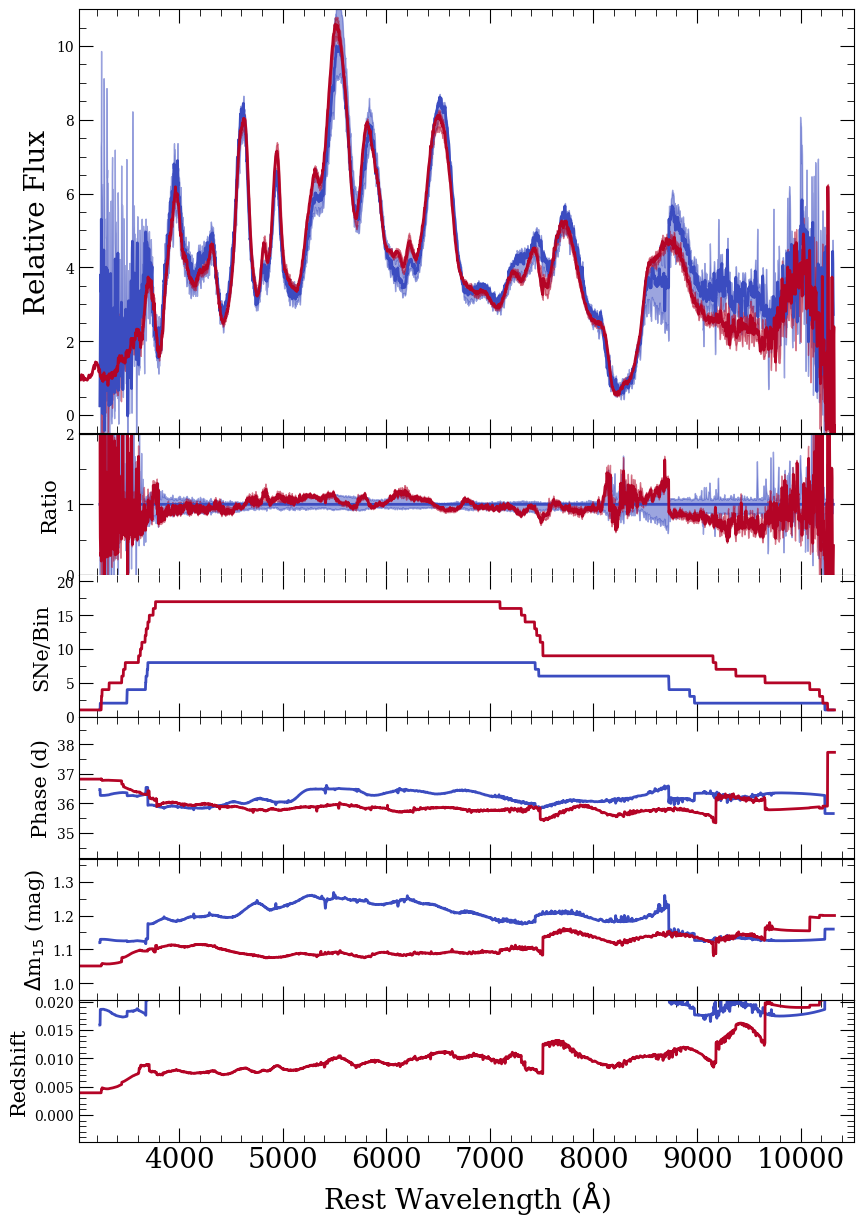

Phase:  40.254233682064495
dm15:  1.0746262506849666
Redshift:  0.021400883118968775
HR:  -0.19393440708436888
Phase:  39.940498171119415
dm15:  1.0588815224651316
Redshift:  0.00948747935634967
HR:  nan


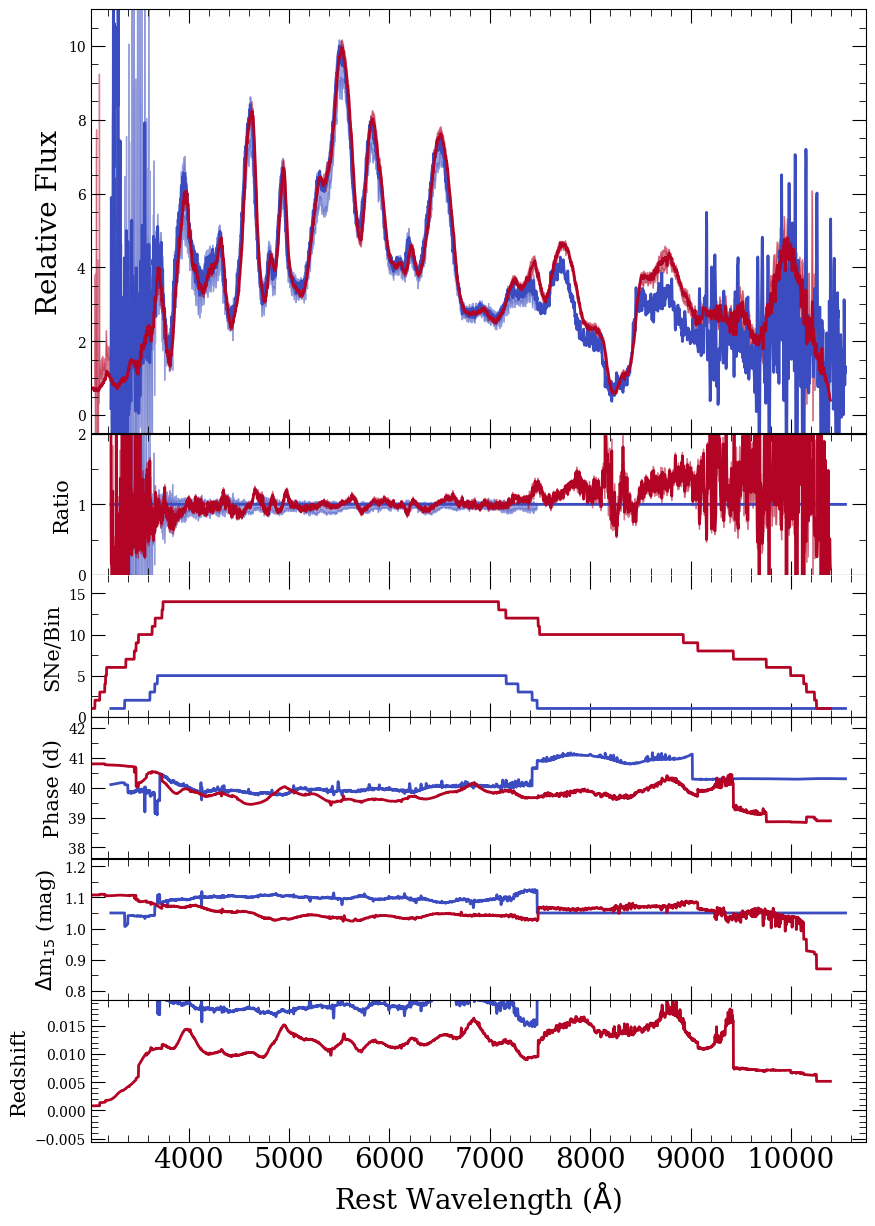

Phase:  44.75303158168924
dm15:  1.177531541743668
Redshift:  0.026707054250370902
HR:  -0.0072323394271872656
Phase:  44.10460126674657
dm15:  1.051225455344704
Redshift:  0.014293280822696276
HR:  nan


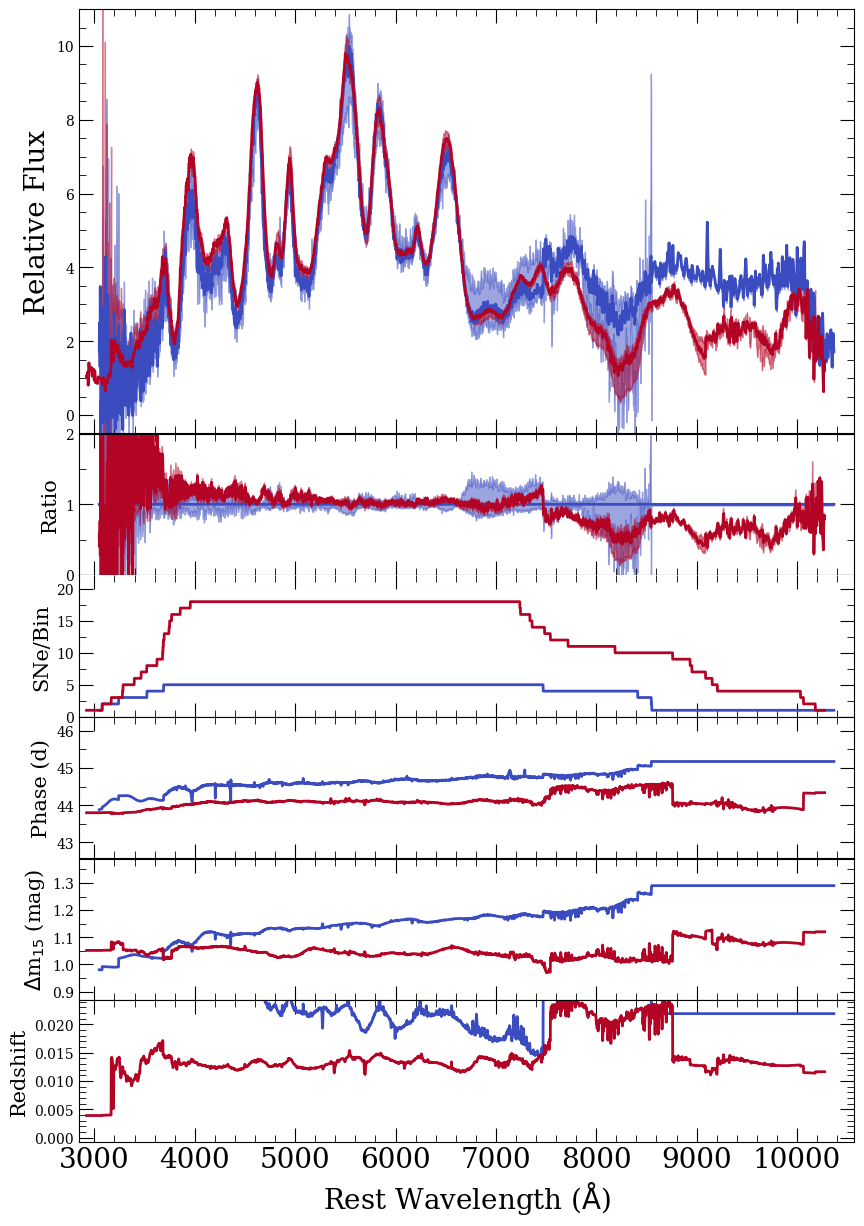

Phase:  47.06862528557001
dm15:  1.08408133300305
Redshift:  0.0117177737724655
HR:  nan
Phase:  48.60039950175048
dm15:  0.9997768488422303
Redshift:  0.01221007019181741
HR:  -0.07444628841406713


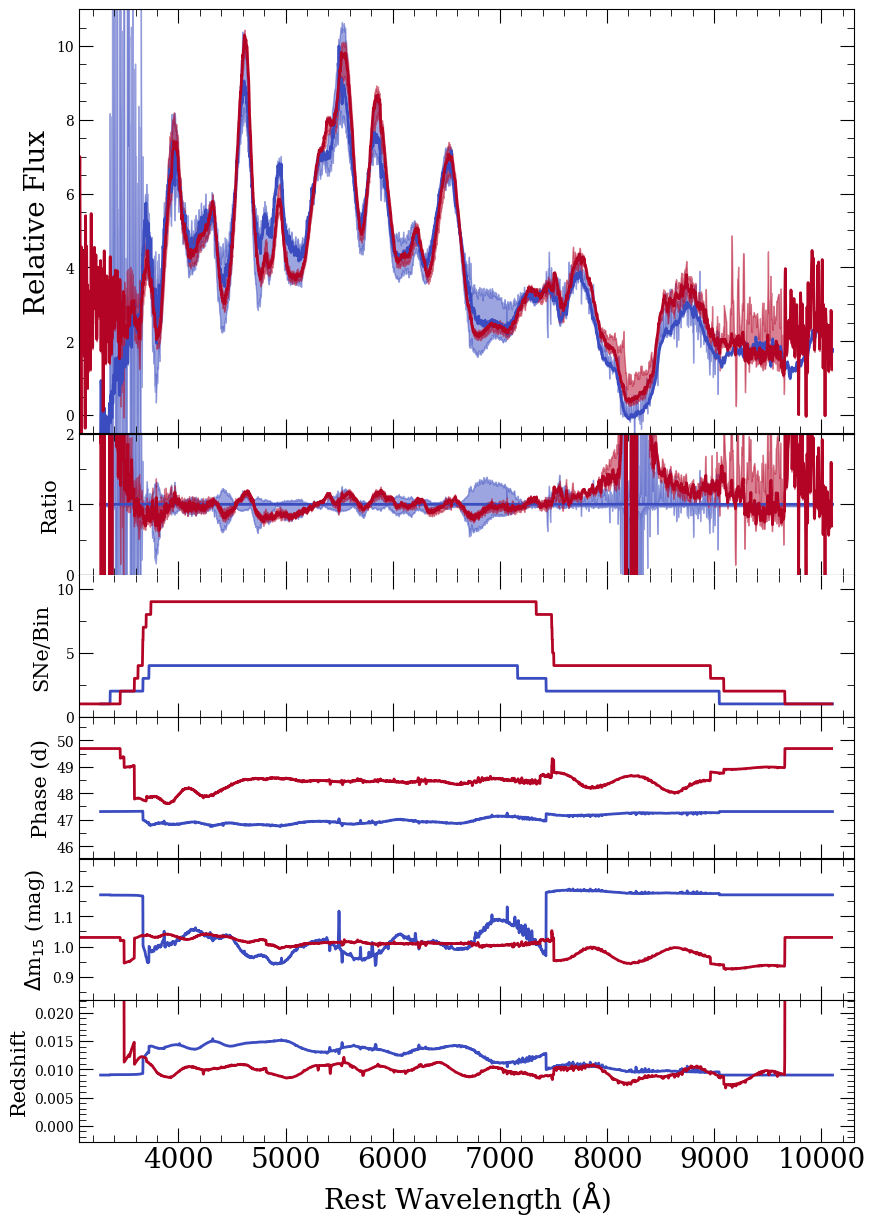

In [18]:
for i in range(len(composites_lowssfr)):
    comp_list = [composites_lowssfr[i], composites_highssfr[i]]
    kpora.set_min_num_spec(comp_list, 1)
    kplot.comparison_plot(comp_list, scale_type=False, min_num_show=1)

In [23]:
kpora.save_comps_to_files(composites_lowssfr[1:-1], 'ssfr_low', num_avg = 5, boot=True)
kpora.save_comps_to_files(composites_highssfr[1:-1], 'ssfr_high', num_avg = 5, boot=True)

-7.79 1.06 0.022
../../David_Comps/ssfr_low_N=11_Nspec=29_phase=m7.79_dm15=1.06_z=0.022.txt
-3.61 1.1 0.027
../../David_Comps/ssfr_low_N=20_Nspec=43_phase=m3.61_dm15=1.1_z=0.027.txt
0.05 1.16 0.021
../../David_Comps/ssfr_low_N=25_Nspec=52_phase=p0.05_dm15=1.16_z=0.021.txt
3.88 1.13 0.025
../../David_Comps/ssfr_low_N=20_Nspec=51_phase=p3.88_dm15=1.13_z=0.025.txt
7.79 1.18 0.022
../../David_Comps/ssfr_low_N=18_Nspec=39_phase=p7.79_dm15=1.18_z=0.022.txt
12.4 1.15 0.025
../../David_Comps/ssfr_low_N=16_Nspec=25_phase=p12.4_dm15=1.15_z=0.025.txt
15.64 1.13 0.027
../../David_Comps/ssfr_low_N=14_Nspec=20_phase=p15.64_dm15=1.13_z=0.027.txt
19.46 1.08 0.025
../../David_Comps/ssfr_low_N=12_Nspec=18_phase=p19.46_dm15=1.08_z=0.025.txt
24.23 1.11 0.021
../../David_Comps/ssfr_low_N=11_Nspec=14_phase=p24.23_dm15=1.11_z=0.021.txt
27.99 1.08 0.018
../../David_Comps/ssfr_low_N=11_Nspec=14_phase=p27.99_dm15=1.08_z=0.018.txt
31.77 1.17 0.024
../../David_Comps/ssfr_low_N=15_Nspec=19_phase=p31.77_dm15=1.17_z

In [19]:
phases_lowssfr_1, comp_lowssfr_B_1, comp_lowssfr_V_1, errors_lowssfr_1 = sa.measure_comp_1m2(composites_lowssfr[1:-1], boot_arrs = boot_sn_arrays_lowssfr[1:-1], error=True)
phases_highssfr_1, comp_highssfr_B_1, comp_highssfr_V_1, errors_highssfr_1 = sa.measure_comp_1m2(composites_highssfr[1:-1], boot_arrs = boot_sn_arrays_highssfr[1:-1], error=True)


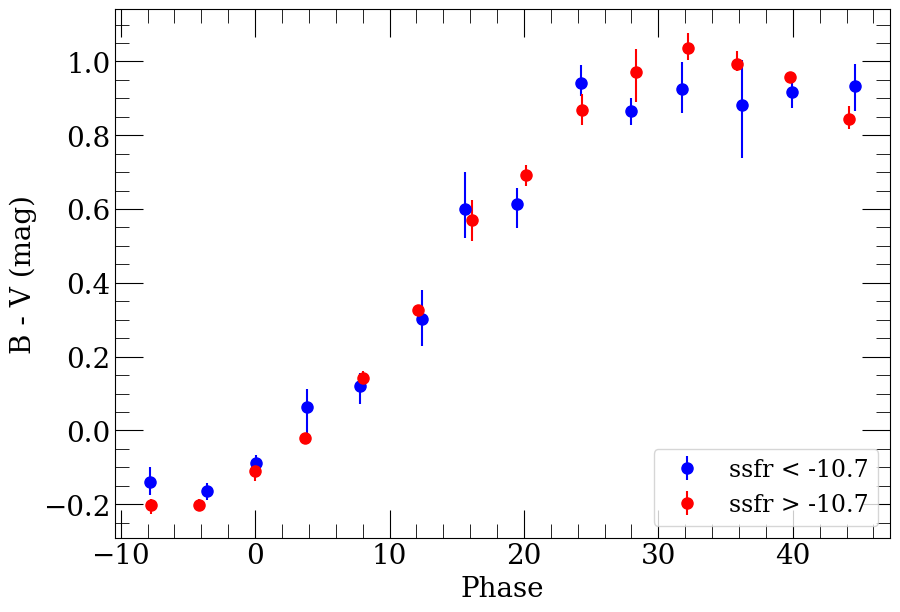

In [20]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Phase', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=10)
plt.errorbar(phases_lowssfr_1, np.asarray(comp_lowssfr_B_1)-np.asarray(comp_lowssfr_V_1), yerr=errors_lowssfr_1,fmt='o', markersize=8, color = 'blue', label='ssfr < -10.7')
plt.errorbar(phases_highssfr_1, np.asarray(comp_highssfr_B_1)-np.asarray(comp_highssfr_V_1), yerr=errors_highssfr_1, fmt='o', markersize=8, color = 'red', label='ssfr > -10.7')
plt.legend(loc=4, fontsize=17, numpoints=1)
# plt.savefig('../../Hubble_Residual_Paper/hr_color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [21]:
phases_lowssfr, comp_lowssfr_V, comp_lowssfr_i, errors_lowssfr = sa.measure_comp_1m2(composites_lowssfr[1:-1], filts = ['GROUND_JOHNSON_V','SDSS_i'], boot_arrs = boot_sn_arrays_lowssfr[1:-1], error=True)
phases_highssfr, comp_highssfr_V, comp_highssfr_i, errors_highssfr = sa.measure_comp_1m2(composites_highssfr[1:-1], filts = ['GROUND_JOHNSON_V','SDSS_i'], boot_arrs = boot_sn_arrays_highssfr[1:-1], error=True)


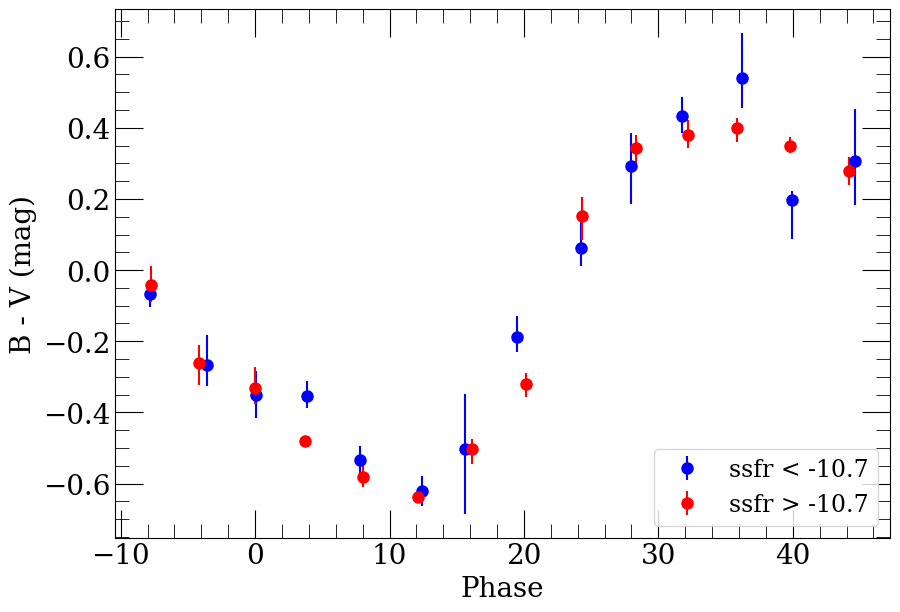

In [22]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Phase', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=10)
plt.errorbar(phases_lowssfr, np.asarray(comp_lowssfr_V)-np.asarray(comp_lowssfr_i), yerr=errors_lowssfr,fmt='o', markersize=8, color = 'blue', label='ssfr < -10.7')
plt.errorbar(phases_highssfr, np.asarray(comp_highssfr_V)-np.asarray(comp_highssfr_i), yerr=errors_highssfr, fmt='o', markersize=8, color = 'red', label='ssfr > -10.7')
plt.legend(loc=4, fontsize=17, numpoints=1)
# plt.savefig('../../Hubble_Residual_Paper/hr_color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [84]:
import spectral_analysis as sa

-11.549
-10.997415134434632
-11.388626576876426


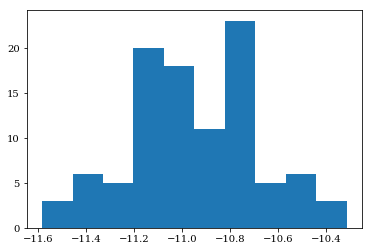

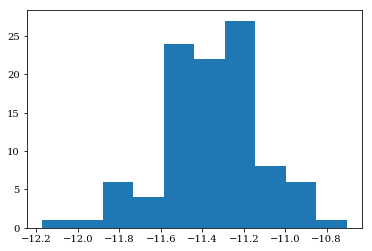

ERR:  0.2443223481581045
ERR:  0.19572397382958595
0 2005eq_combined -10.118919436719901
1 2003hu_combined -10.118919436719901
2 2011fe_combined -10.021456720684506
3 2005cf_combined -9.92402359558339
4 2004as_combined -11.486503345380463
5 1999ef_combined -10.704317028490788
6 2006ac_combined -12.565098143327868
7 2006ak_combined -11.192961724806997
8 2003du_combined -10.411485110219218
9 2002fk_combined -9.631901785684354
10 2006lu_combined -10.118919436719901
11 2007jg_combined -10.801986823599174
12 2002de_combined -10.997415134434632
13 2003fa_combined -9.92402359558339
14 1998ab_combined -9.145624102899788
15 2002dp_combined -9.729246126124085
16 1994ae_combined -10.704317028490788
17 1995al_combined -12.172468233516442
18 2002ha_combined -10.606676809804412
19 1990n -10.216411741678657
20 1994q -9.92402359558339
21 1997bp -14.041667214102862
22 2005hj -10.411485110219218
23 2006en -10.313933633529203
24 2007cq -10.313933633529203
25 1996c -10.313933633529203
26 1997bq -13.154928

In [92]:
p4_comps = [composites_highssfr[5],composites_lowssfr[5]]
p4_sn_arrs = [sn_arrays_highssfr[5], sn_arrays_lowssfr[5]]
p4_boots = [boot_sn_arrays_highssfr[5], boot_sn_arrays_lowssfr[5]]

p4_data = sa.measure_vels(p4_comps, p4_sn_arrs, 'globalssfr', boot_arrs = p4_boots, plot=False)

[-10.997415134434632, -11.388626576876426]


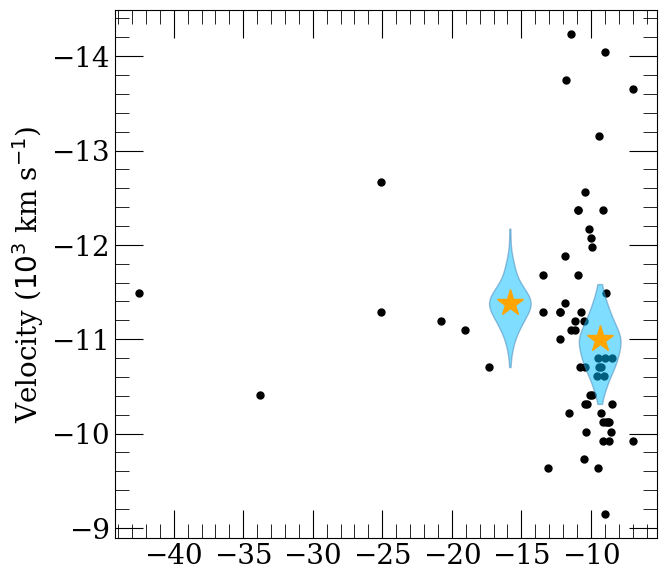

In [104]:
sa.plot_vels(p4_data, vwidth=3, savename=None)

In [102]:
for sn in p4_sn_arrs[1]:
    if sn.other_meta_data['globalssfr'] < -17:
        print sn.name, sn.other_meta_data['globalssfr']

2001eh_combined -17.31
1999gp -19.041
2005hc -20.774
2006bw -25.101
2008af -42.46
2008hv -33.782
2009ig -25.108
